<a href="https://colab.research.google.com/github/OlhaZahrebelna/Bank-Customer-Churn-Prediction/blob/main/Zahrebelna_Olha%22HW_2_3_%D0%94%D0%B5%D1%80%D0%B5%D0%B2%D0%B0_%D0%BF%D1%80%D0%B8%D0%B9%D0%BD%D1%8F%D1%82%D1%82%D1%8F_%D1%80%D1%96%D1%88%D0%B5%D0%BD%D1%8C_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми знову працюємо з даними з нашого змагання ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

Тут ми побудуємо рішення задачі класифікації з використанням Decision Trees і зробимо новий submission на змагання на Kaggle.

В цьому ДЗ ми працюємо без pipelines, бо так буде зручніше для візуалізації і інтерпретації моделі дерева прийняття рішень. Так буває і в робочих проєктах: іноді зручніше використати sklearn.Pipelines, іноді зручніше без них. На етапі пошуку рішення (research) зручніше без пайплайнів, а з пайплайнами - коли ви відлагодили процес обробки даних і хочете поекспериментувати з різними моделями і гіперпараметрами.

**Завдання 1.**

У попередньому домашньому завданні, `HW 2.7 Логістична регресія з scikit learn.ipynb`, ми писали обробку даних для змагання. Ваше завдання зараз - за прикладом, наведеним в лекції `Майстер-клас з перенесення коду з jupyter notebook у Python модуль`, перенести попередню обробку сирих даних з вашого розв'язку ДЗ 2.7 у файл `process_bank_churn.py` в функцію `preprocess_data(...)`.

Функція `preprocess_data()` має приймати `raw_df` і вертати `X_train`, `train_targets`, `X_val`, `val_targets`, `input_cols`(перелік назв колонок, які Ви використовуєте в X), `scaler`, `encoder`, які ми потім будемо використовувати для тренування дерева прийняття рішень.


### Кроки попередньої обробки:

1. Обираємо колонки для роботи. В цьому завдання для чистоти експериментів рекомендую прибрати колонку `Surname`, так буде простіше інтрепретувати модель. Ви можете її додати вже за самостійних подальших експериментів.
2. Розбиття сирих даних на тренувальні і валідаційні.
3. Обробка категоріальних даних (one hot encoding).
4. Масштабування числових даних (було частиною попередньої обробки в попередніх завданнях). Для дерев нам не обовʼязково масштабувати ознаки, тож в коді можна зробити цю частину опціональною, додавши в `preprocess_data` параметр `scaler_numeric`, який приймає значення `True` або `False`. Це дозволить використовувати код попередньоъ обробки з різними моделями.


### Інструкції:
1. Перенесіть попередню обробку даних у файл `process_bank_churn.py`.
2. Забезпечте модулярну структуру функцій: кожна функція повинна виконувати лише одну дію, наприклад, масштабувати ознаки.
3. Додайте докстрінги до кожної функції.
4. Використовуйте typing для аргументів та значень, що повертаються функціями.
5. Передбачте обробку нових даних. Додайте спеціальну функцію `preprocess_new_data(...)`, яка приймає на вхід нові дані в вигляді pandas DataFrame та використовує вже навчені скейлер та енкодер (передані теж як аргументи фукнціх) для їх обробки. Ця функція буде корисною для обробки нових даних перед передбаченням або оцінкою моделі, коли оброблятимемо `test.csv`.

Можна і рекомендовано виконувати це завдання з ChatGPT (бажано, новіше, ніж 3.5) як було наведено у відео-прикладі, тільки **ваше додаткове завдання - розібратись з кодом, який вам згенерувала мовна модель :)**.

## В результаті цього завдання

1. Завантажте ваш готовий `process_bank_churn.py` файл на GitHub у свій репозиторій.
2. Додайте посилання на файл в репозиторії тут у ноутбуці.
3. Нижче зробіть імпорт функції `preprocess_data` з вашого модуля `process_bank_churn.py`.



In [1]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import importlib.util

path = "/content/drive/MyDrive/Competition/process_bank_churn.py"
spec = importlib.util.spec_from_file_location("process_bank_churn", path)
mod = importlib.util.module_from_spec(spec)
spec.loader.exec_module(mod)

# перевірка
print("Loaded:", mod)
print("Functions:", [x for x in dir(mod) if not x.startswith("_")][:20])

Loaded: <module 'process_bank_churn' from '/content/drive/MyDrive/Competition/process_bank_churn.py'>
Functions: ['Any', 'Dict', 'List', 'OneHotEncoder', 'Optional', 'Pipeline', 'Sequence', 'SimpleImputer', 'StandardScaler', 'Tuple', 'annotations', 'build_numeric_pipeline', 'build_onehot_encoder', 'create_inputs_targets', 'fit_transform_categorical', 'fit_transform_numeric', 'get_numeric_categorical_cols', 'np', 'pd', 'preprocess_data']


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os
%matplotlib inline

In [4]:
raw_df = pd.read_csv('/content/drive/MyDrive/Competition/train.csv')

In [5]:
data = mod.preprocess_data(raw_df)

https://github.com/OlhaZahrebelna/Bank-Customer-Churn-Prediction/blob/main/process_bank_churn.py

**Завдання 2.**
1. Натренуйте дерево прийняття рішень з зафіксованим `random_state` і з рештою аргументів за замовченням.
2. Виведіть area under ROC для моделі на тренувальних і тестувальних даних. Нам потрібна ця метрика, бо вона основна в змаганні. Модель ок, чи є пере- або недотренування?
3. Виведіть глибину дерева.
4. Побудуйте дерево до глибини 2 включно. Напишіть, які ознаки бачите, що є найвпливовішими тут?
5. Створіть датафрейм `importance_df` з feature importances, де в першому стовпчику `feature` - назва ознаки з нашого Х, а в другому `importance` - значення, наскільки ця ознака є важливою в побудованій моделі. Виведіть топ 10 найвпливовіших ознак разом з їх скором важливості (можна або у вигляді таблиці, або в вигляді barplot).

data[0] = X_train

data[1] = y_train

data[2] = X_val

data[3] = y_val

data[4] = input_cols

data[5] = scaler

data[6] = encoder

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
model = DecisionTreeClassifier(random_state=42)

In [8]:
model.fit(data[0], data[1])

DecisionTreeClassifier(random_state=42)

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.tree import plot_tree, export_text

In [10]:
proba = model.predict_proba(data[2])[:, 1]
roc_auc = roc_auc_score(data[3], proba)

In [11]:
print(f"AUROC на валідаційній вибірці: {roc_auc}")

AUROC на валідаційній вибірці: 0.7633663262634197


In [12]:
model.tree_.max_depth

24

In [14]:
num_features = len(model.feature_importances_)

if len(data[4]) != num_features:
    print(f"Warning: The length of 'input_cols' (data[4]) is {len(data[4])}, but the model has {num_features} features.")
    print("This usually happens if one-hot encoding expanded categorical features but 'input_cols' was not updated accordingly in preprocess_data.")
    print("Generating generic feature names for now to proceed.")
    correct_feature_names = [f'feature_{i}' for i in range(num_features)]
else:
    correct_feature_names = data[4]

importance_df = pd.DataFrame({
    'feature': correct_feature_names,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=False)

This usually happens if one-hot encoding expanded categorical features but 'input_cols' was not updated accordingly in preprocess_data.
Generating generic feature names for now to proceed.


In [18]:
input_cols = data[4]
encoder = data[6]

X_raw = raw_df[input_cols]
num_cols = X_raw.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X_raw.select_dtypes(include=["object"]).columns.tolist()

feature_names = num_cols.copy()
if encoder is not None and len(cat_cols) > 0:
    feature_names += encoder.get_feature_names_out(cat_cols).tolist()

assert len(feature_names) == model.n_features_in_, (len(feature_names), model.n_features_in_)

importance_df = pd.DataFrame({
    "feature": feature_names,
    "importance": model.feature_importances_
}).sort_values("importance", ascending=False)

display(importance_df.head(10))

,feature,importance
2,Age,0.693986
5,NumOfProducts,0.306014
1,CreditScore,0.000000
0,id,0.000000
3,Tenure,0.000000
4,Balance,0.000000
6,HasCrCard,0.000000
7,IsActiveMember,0.000000
8,EstimatedSalary,0.000000
9,Geography_France,0.000000


In [15]:
model = DecisionTreeClassifier(random_state=42, max_depth=2)
model.fit(data[0], data[1])

DecisionTreeClassifier(max_depth=2, random_state=42)

In [16]:
proba = model.predict_proba(data[2])[:, 1]
roc_auc = roc_auc_score(data[3], proba)

In [17]:
print(f"AUROC на валідаційній вибірці: {roc_auc}")

AUROC на валідаційній вибірці: 0.8432944051671467


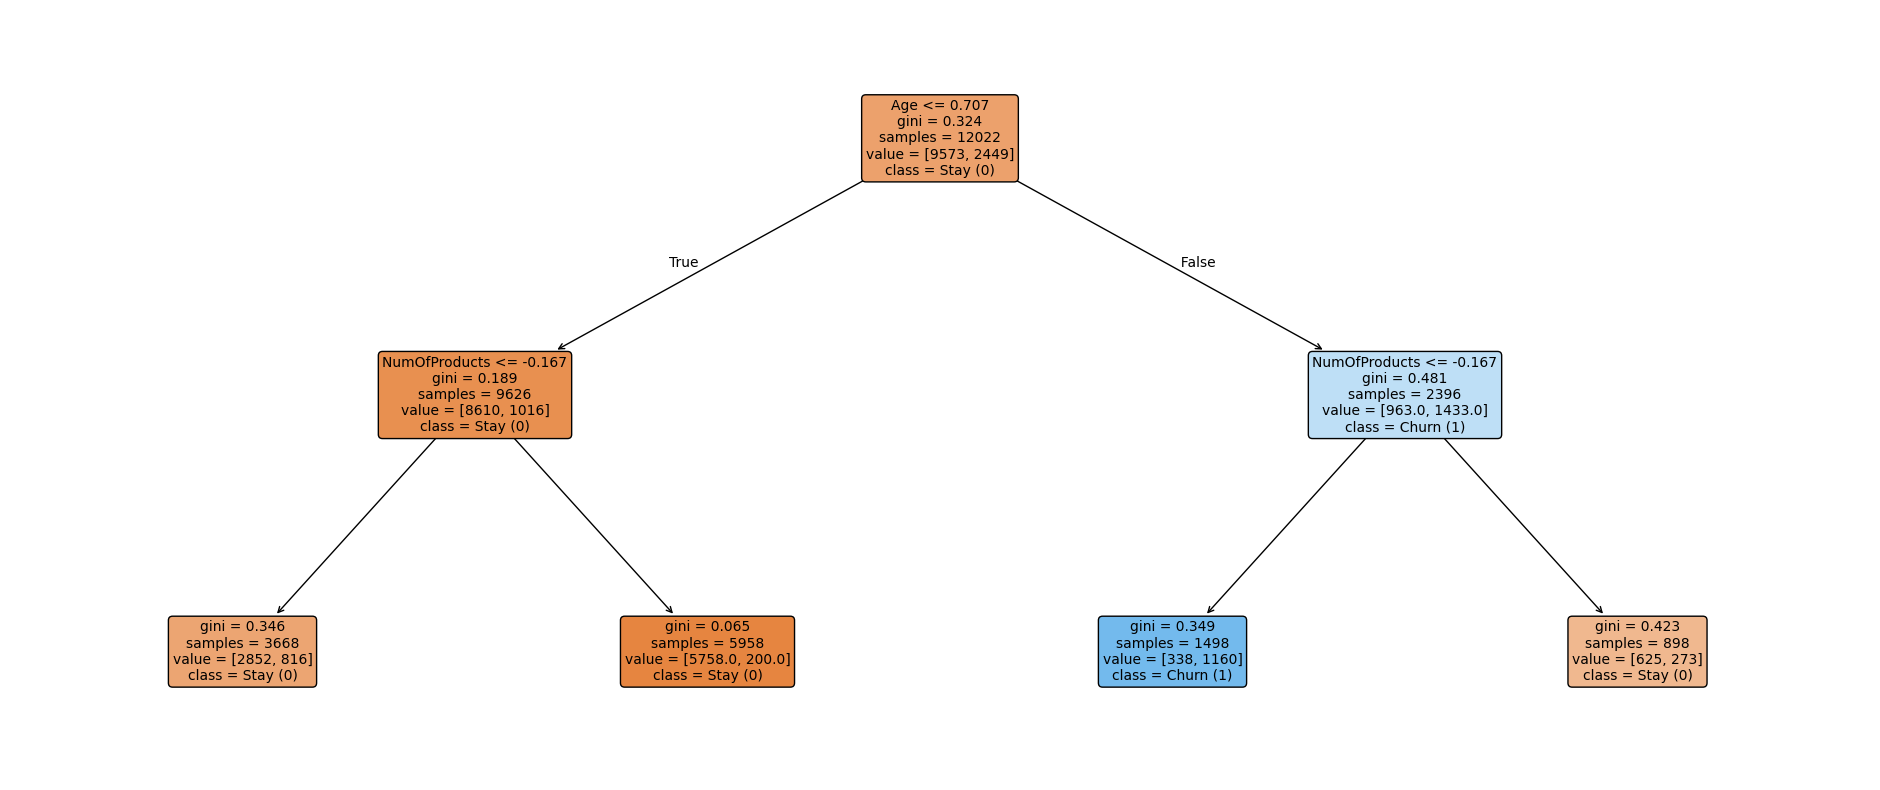

In [19]:
X_raw = raw_df[input_cols]
num_cols = X_raw.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X_raw.select_dtypes(include=["object"]).columns.tolist()

feature_names = num_cols.copy()
if encoder is not None and len(cat_cols) > 0:
    feature_names += encoder.get_feature_names_out(cat_cols).tolist()

# 3) малюємо дерево
plt.figure(figsize=(24, 10))
plot_tree(
    model,
    feature_names=feature_names,
    class_names=["Stay (0)", "Churn (1)"],
    max_depth=2,
    filled=True,
    rounded=True,
    fontsize=10,
)
plt.show()

З візуалізації дерева (max_depth=2) та зі значень топ 10 впливових ознак видно, що ключовими ознаками, які найбільше впливають на прогноз відтоку, є Age та NumOfProducts.

**Завдання 3**. Спробуйте знайти такі параметри моделі `DecisionTree` аби модель генералізувала ліпше (був вищий показник AUROC на валідаційній вибірці). Проекспериментуйте з різними значеннями параметрів `max_leaf_nodes`, `max_depth` та лишіть ті, які дають найкращий результат, разом з відповідними AUROC на тренувальній і валідаційній вибірках.

В цьому завданні спробуйте просто знайти параметри методом "тика" :)

In [20]:
model = DecisionTreeClassifier(random_state=42, max_depth=6)
model.fit(data[0], data[1])
proba = model.predict_proba(data[2])[:, 1]
roc_auc = roc_auc_score(data[3], proba)
print(f"AUROC на валідаційній вибірці: {roc_auc}")

AUROC на валідаційній вибірці: 0.9228133019114951


Експерементувала та прийщла до висновку що краща глибина це 6 та без max_leaf_nodes, бо після додавання значення AUROC знижувались.

**Завдання 4**. В циклі пройдіться по значенням max_depth від 1 до 20 включно, на кожній ітерації натренуйте DecisionTree модель і виміряйте AUROC на трейн і валідаційних даних.

В кінці виведіть на графік залеєність між AUROC на трейн і валідаційних даних і номером ітерації.

In [21]:
train_roc_aucs = []
val_roc_aucs = []

for i in range(1, 21):
  model = DecisionTreeClassifier(random_state=42, max_depth=i)
  model.fit(data[0], data[1])

  train_proba = model.predict_proba(data[0])[:, 1]
  train_roc_auc = roc_auc_score(data[1], train_proba)
  train_roc_aucs.append(train_roc_auc)


  val_proba = model.predict_proba(data[2])[:, 1]
  val_roc_auc = roc_auc_score(data[3], val_proba)
  val_roc_aucs.append(val_roc_auc)

  print(f"Max Depth: {i}, Train AUROC: {train_roc_auc:.4f}, Validation AUROC: {val_roc_auc:.4f}")

Max Depth: 1, Train AUROC: 0.7423, Validation AUROC: 0.7447
Max Depth: 2, Train AUROC: 0.8438, Validation AUROC: 0.8433
Max Depth: 3, Train AUROC: 0.8985, Validation AUROC: 0.8942
Max Depth: 4, Train AUROC: 0.9122, Validation AUROC: 0.9103
Max Depth: 5, Train AUROC: 0.9258, Validation AUROC: 0.9194
Max Depth: 6, Train AUROC: 0.9321, Validation AUROC: 0.9228
Max Depth: 7, Train AUROC: 0.9403, Validation AUROC: 0.9068
Max Depth: 8, Train AUROC: 0.9484, Validation AUROC: 0.8971
Max Depth: 9, Train AUROC: 0.9584, Validation AUROC: 0.8772
Max Depth: 10, Train AUROC: 0.9703, Validation AUROC: 0.8482
Max Depth: 11, Train AUROC: 0.9798, Validation AUROC: 0.8360
Max Depth: 12, Train AUROC: 0.9879, Validation AUROC: 0.8154
Max Depth: 13, Train AUROC: 0.9933, Validation AUROC: 0.8009
Max Depth: 14, Train AUROC: 0.9966, Validation AUROC: 0.7758
Max Depth: 15, Train AUROC: 0.9983, Validation AUROC: 0.7722
Max Depth: 16, Train AUROC: 0.9992, Validation AUROC: 0.7686
Max Depth: 17, Train AUROC: 0.999

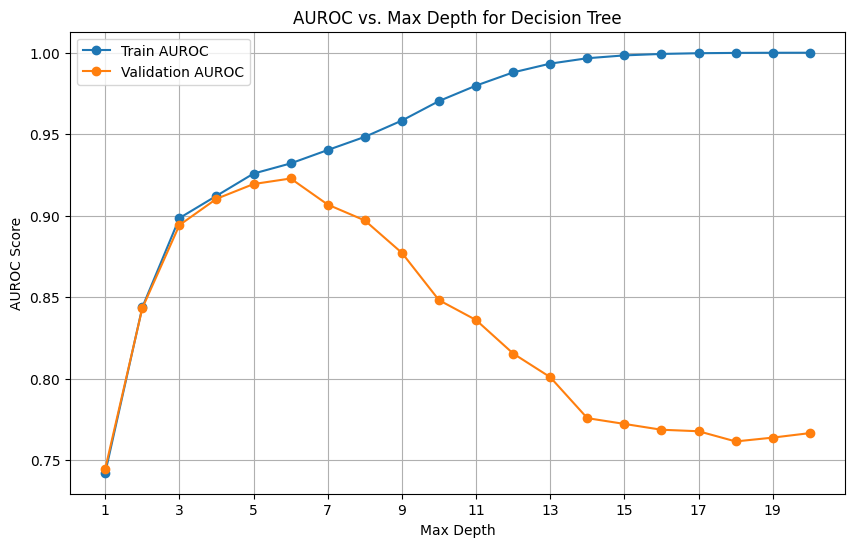

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), train_roc_aucs, label='Train AUROC', marker='o')
plt.plot(range(1, 21), val_roc_aucs, label='Validation AUROC', marker='o')
plt.title('AUROC vs. Max Depth for Decision Tree')
plt.xlabel('Max Depth')
plt.ylabel('AUROC Score')
plt.xticks(range(1, 21, 2))
plt.grid(True)
plt.legend()
plt.show()

**Завдання 5**.
1. Натренуйте модель `DecisionTree` з найкращим значенням `max_depth`, яке ви знайшли на попередній ітерації.
2. Завантажте тестові дані змагання з `test.csv`.
3. Зробіть попередню обробку даних з функцією `preprocess_new_data` з вашого модуля `process_bank_churn.py`.
4. Зробіть передбачення використовуючи цю модель на тестових даних змагання.
5. Сформуйте `submission.csv`.
6. Зробіть новий Submission на Kaggle і додайте тут скріншот Вашого скору на паблік лідерборді :)


In [23]:
model = DecisionTreeClassifier(random_state=42, max_depth=6)
model.fit(data[0], data[1])

DecisionTreeClassifier(max_depth=6, random_state=42)

In [24]:
test = pd.read_csv('/content/drive/MyDrive/Competition/test.csv')

In [25]:
test_processed = mod.preprocess_new_data(
    test,
    scaler=data[5],
    encoder=data[6],
    input_cols=data[4],
)

In [26]:
proba = model.predict_proba(test_processed)[:, 1]

In [27]:
print(test.columns)

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')


In [28]:
submission = pd.DataFrame({
    "id": test["id"],
    "Exited": proba
})

submission.to_csv("submission.csv", index=False)
submission.head()

,id,Exited
0,15000,0.174658
1,15001,0.040636
2,15002,0.020221
3,15003,0.712329
4,15004,0.040636


In [29]:
!ls -la

total 280
drwxr-xr-x 1 root root   4096 Feb 21 14:43 .
drwxr-xr-x 1 root root   4096 Feb 21 09:38 ..
drwxr-xr-x 4 root root   4096 Jan 16 14:24 .config
drwx------ 6 root root   4096 Feb 21 14:40 drive
drwxr-xr-x 2 root root   4096 Feb 21 14:43 .ipynb_checkpoints
drwxr-xr-x 1 root root   4096 Jan 16 14:24 sample_data
-rw-r--r-- 1 root root 258679 Feb 21 14:43 submission.csv


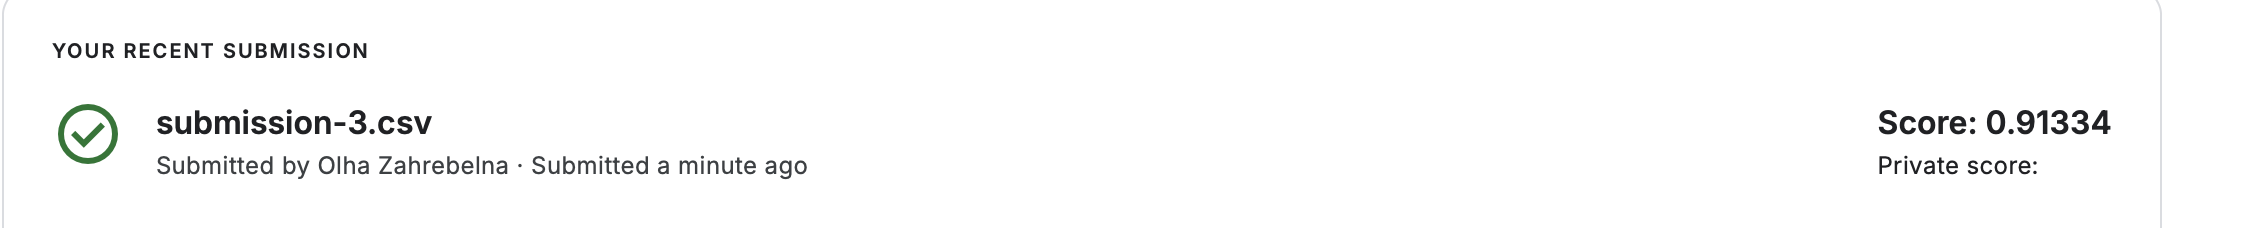